In [52]:
import torch
import torch.nn as nn

class basic_nn(nn.Module):
    def __init__(self, width = 100):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(1, width),
            nn.ReLU(),
            nn.Linear(width,1)
        )

    def forward(self, x):
        x = self.seq(x)
        return x # y
    
device = 'cuda' if torch.cuda.is_available else 'cpu'

In [55]:
# everything is for 100 nns
N = 40
width = 100000
nns = [basic_nn(width = width).to(device) for _ in range(N)] # 100 random nets
inits = {
    i: [
        (x/50, (nns[i](torch.tensor([x / 50], dtype=torch.float32).to(device)).to('cpu')).item()   ) 
        for x in range(-400, 400)
    ]
    for i in range(N)
}



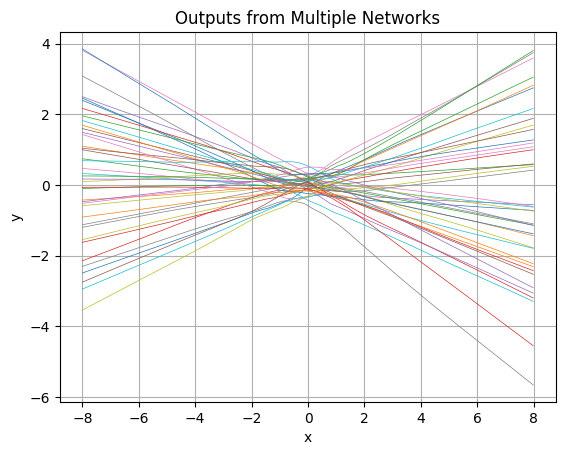

In [64]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(N):
    data = np.array(inits[i])
    plt.plot(data[:, 0], data[:, 1], linewidth=0.5)

plt.title("Outputs from Multiple Networks")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
